In [1]:
!pip install opencv-python
!pip install matplotlib

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time

# Task 1
Convert Video to images and vice versa

In [3]:
def Vid2Image(vid, directoryName):
    '''
    function to convert video to images
    Input:
        vid - video sequence to convert to images
        directoryName - name of direcotry to output images 
    Output:
        none
    '''
    if not os.path.exists(directoryName):
        os.mkdir(directoryName)

    
    isFrame, image = vid.read()
    i = 0
    print('Converting video to images')
    while(isFrame):
        imageName = '%06d.jpg' % i
        imagePath = directoryName + '/' + imageName
        cv2.imwrite(imagePath, image)
        isFrame, image = vid.read()
        i = i + 1
    print('Conversion complete. Output saved in ' + directoryName)
        
def Image2Vid(dirName, fps, outputDir, vidName):

    '''
    function to conver images to video with given fps
    Input:
        dirName - directory name with images
        fps - output fps
        outputDir - output directory name to save video
    Output:
        none
    '''
    if not os.path.exists(outputDir):
        os.mkdir(outputDir)
    
    imageArray = []
    files = [images for images in os.listdir(dirName) if os.path.isfile(os.path.join(dirName, images))]
    files.sort()
    

    for i in range(len(files)):
        fileName = dirName + '/'+ files[i]
        image = cv2.imread(fileName)
        imageArray.append(image)
    
    height, width, layers = imageArray[0].shape
    size = (width, height)

    video = cv2.VideoWriter(outputDir + '/' + vidName,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(imageArray)):
        video.write(imageArray[i])
    video.release()
    print('Video path ' + outputDir + '/' + vidName)

# Task 2
Capture images from webcam

In [4]:
def CaptureImagesWebcam(outputDir):

    '''
    Function to capture images from webcam
    Press Q to stop capturing images
    Input:
        outputDir - output directory name
    Output:
        none
    '''

    if not os.path.exists(outputDir):
        os.mkdir(outputDir)

    cam = cv2.VideoCapture(0)
    i = 0
    while True:

        isFrame, image = cam.read()
        imageName = '%06d.jpg' % i
        imagePath = outputDir + '/' + imageName
        cv2.imshow('webcam',image)
        cv2.imwrite(imagePath, image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        isFrame, image = cam.read()
        i = i + 1

# Task 3
Chroma keying

In [5]:
def ChromaKey(image1, image2):

    '''
    Chroma keying function to replace background of image1 
    Input:
        image1 - foreground image
        image2 - background image
    Output:
        imageOut - image with foreground of image 1 and background of image 2    
    '''

    hsv1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    hsv2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    lower_green = np.array([0,205,0], dtype=np.uint8)
    upper_green = np.array([100,255,150], dtype=np.uint8)
    mask = cv2.inRange(hsv1, lower_green, upper_green)
    res = cv2.bitwise_and(image1,image1, mask= mask)
    res = hsv1 - res
    background = image2[:mask.shape[0],:mask.shape[1],:]
    background[mask == 0] = [0, 0, 0]    
    imageOut = res + background
    # imageOut = cv2.cvtColor(imageOut, cv2.COLOR_BGR2RGB)
    # plt.imshow(imageOut)
    # plt.show()
    
    return imageOut


def ReplaceBackgroundGreen(inputDir1, inputDir2, outputDir):

    '''
    Function to change background of directory
    Input:
        inputDir1 - input directory containing images for foreground
        inputDir2 - input directory containing images for background
        outputDir - directory to store output images
    Output:
        none
    '''
    if not os.path.exists(outputDir):
        os.mkdir(outputDir)

    imageArray = []
    files1 = [images for images in os.listdir(inputDir1) if os.path.isfile(os.path.join(inputDir1, images))]
    files1.sort()

    imageArray2 = []
    files2 = [images for images in os.listdir(inputDir2) if os.path.isfile(os.path.join(inputDir2, images))]
    files2.sort()
    numFiles = len(files1)

    if len(files2) < len(files1):
        numFiles = len(files2)


    for i in range(numFiles):
        fileName = inputDir1 + '/'+ files1[i]
        image = cv2.imread(fileName)
        imageArray.append(image)

    for i in range(numFiles):
        fileName = inputDir2 + '/'+ files2[i]
        image = cv2.imread(fileName)
        imageArray2.append(image)
    
    
    i = 0
    print('Starting chroma keying')
    for j in range(numFiles):
        
        imageName = '%06d.jpg' % i
        imagePath = outputDir + '/' + imageName
        i = i + 1
        outputImage = ChromaKey(imageArray[j], imageArray2[j])
        cv2.imwrite(imagePath, outputImage)
    print('Chroma keying complete. Output: ' + outputDir)

# Trial output on one image

In [6]:
if __name__ == "__main__":
    
    dirName = 'testFramesHelicopter'
    dirBackground = 'testFrames'
    videoName = 'GreenHelicopter.mp4'
    videoOutputDir = 'videoDirHelicopter'
    videoName2 = 'test2.mp4'
    dirName2 = 'testFrames'
    
    fps = 30
    webcamOutputDir = 'webOut'
    videoOutputName = 'testHelicopter.avi'
    

Converting video to images
Conversion complete. Output saved in testFramesHelicopter
Converting video to images
Conversion complete. Output saved in testFrames


Text(0.5, 1.0, 'foreground image')

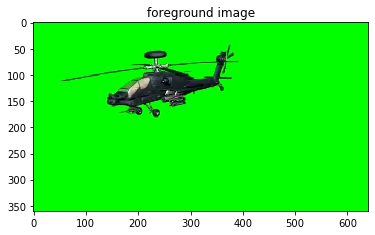

In [7]:
    vid = cv2.VideoCapture(videoName)
    Vid2Image(vid, dirName)
    
    vid2 = cv2.VideoCapture(videoName2)
    Vid2Image(vid2, dirName2)
    
    image = 'testFramesHelicopter/000128.jpg'
    outputGreen = 'greenOut'
    ChromaKeyOutputDir = 'ChromaResultHelicopter'
    image = cv2.imread(image)
    plt.imshow(image)
    plt.title('foreground image')
    

Text(0.5, 1.0, 'background image')

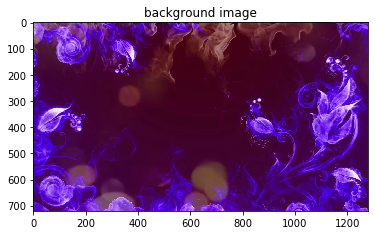

In [8]:
    test = cv2.imread('testFrames/000128.jpg')
    plt.imshow(test)
    plt.title('background image')

Text(0.5, 1.0, 'Chroma key result')

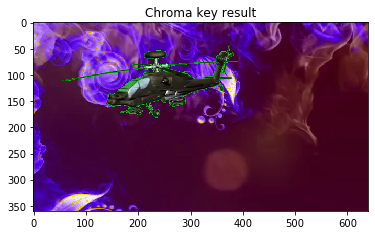

In [9]:
    out = ChromaKey(image, test)
    plt.imshow(out)
    plt.title('Chroma key result')

In [10]:
    ReplaceBackgroundGreen(dirName, dirBackground, ChromaKeyOutputDir)
    Image2Vid(ChromaKeyOutputDir, fps, videoOutputDir, videoOutputName)
#     print(ReplaceBackgroundGreen.__doc__)
#     CaptureImagesWebcam(webcamOutputDir)

Starting chroma keying
Chroma keying complete. Output: ChromaResultHelicopter
Video path videoDirHelicopter/testHelicopter.avi
